### For processing the table of classification data in tabular form
add in the scatterometer winds  
add in the Nd  
add in the CF  
add in the depth (Ryan?)  
MERRA:  
add in the EIS  
add in the SST  
add in the subsidence   


In [24]:
import sys
sys.path.insert(0, '/home/disk/p/jkcm/Code')
import matplotlib as mpl
import pickle
import seaborn as sns
import numpy as np
# import glob
# import xarray as xr
import matplotlib.pyplot as plt
# import datetime as dt
# from Lagrangian_CSET import met_utils as mu
# import multiprocessing as mp
# from tools.LoopTimer import LoopTimer
# from Lagrangian_CSET import utils
# from multiprocessing import Pool, cpu_count

import utils
import pandas as pd

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
all_df =  utils.load_class_data('all')
sep_df = all_df.loc[all_df['loc']=='SEP']
sum_sep_df = sep_df.loc[sep_df.season=='DJF']
win_sep_df = sep_df.loc[sep_df.season=='JJA']
spr_sep_df = sep_df.loc[sep_df.season=='SON']
fall_sep_df = sep_df.loc[sep_df.season=='MAM']


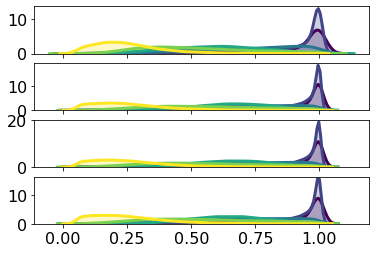

In [26]:
naxes = len(np.unique(all_df['locyear']))
fig, axl = plt.subplots(nrows=4, sharex=True)
for i, (key, df_ly) in enumerate(all_df.groupby('locyear')): 
    ngrouped = df_ly.groupby('cat')
    axi = axl[i]
    colors = [mpl.cm.get_cmap('viridis')(i) for i in np.linspace(0,1,6)]
    for i, name in enumerate([4, 0, 2, 3, 1, 5]):
        group = ngrouped.get_group(name)
        sns.distplot(group['low_cf'].values, hist = False, kde = True,
                     kde_kws = {'shade': True, 'linewidth': 3},
                     label = utils.short_labels[name], color=colors[i], ax=axi)
#         axi.set_xlabel('low cloud fraction')
#         ax.set_ylabel("normed density")
        axi.get_legend().remove()

In [29]:
savefile = r'/home/disk/eos4/jkcm/Data/MEASURES/beta_data/all_with_div_2.pickle'
df = pickle.load(open(savefile, 'rb'))

In [30]:
df['season'] = [['DJF','MAM','JJA','SON'][np.floor((i.month)%12/3).astype(int)] for i in df.datetime]
sep_df = df.loc[df['loc']=='SEP']
cset_df = df.loc[df['loc']=='NEP']
sum_sep_df = sep_df.loc[sep_df.season=='DJF']
win_sep_df = sep_df.loc[sep_df.season=='JJA']
sum_sep_df_cent = sum_sep_df.loc[sum_sep_df.lat<-15]
win_sep_df_cent = win_sep_df.loc[win_sep_df.lat<-15]

(<Figure size 720x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f19735f02b0>)

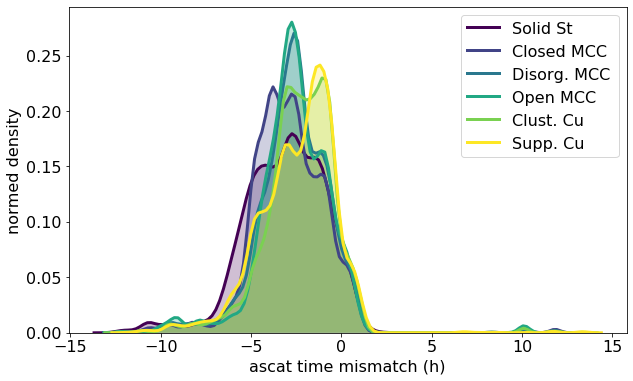

In [31]:
utils.plot_dataframe_by_cat(win_sep_df_cent, 'ascat_time_offset', scale_factor=1, xlabel='ascat time mismatch (h)', ax=None, savename=None,
                          cert_thresh=None, verbose=False)

Solid St:, total:6166, usable:60%
Closed MCC :, total:3291, usable:57%
Disorg. MCC:, total:4340, usable:54%
Open MCC:, total:839, usable:52%
Clust. Cu:, total:10805, usable:52%
Supp. Cu:, total:9936, usable:51%


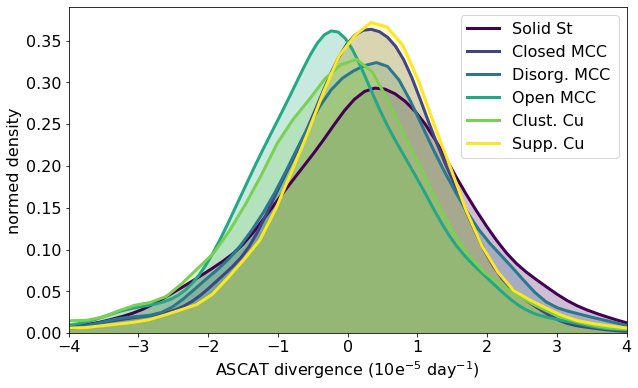

In [8]:
fig, ax = utils.plot_dataframe_by_cat(cset_df, 'ascat_div', scale_factor=1e5, xlims=(-4, 4) ,xlabel='ASCAT divergence (10e$^{-5}$ day$^{-1}$)', ax=None, savename=None,
                          cert_thresh=None, verbose=True, hist=False)
ax.set_title('Distribution of mean ASCAT wind \n by type, for CSET period/region')
fig.savefig(r'/home/disk/p/jkcm/plots/measures/ascat_mean_CSET.png')

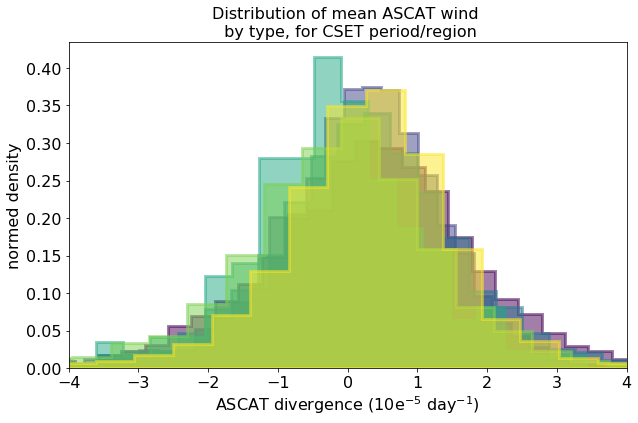

In [14]:
fig, ax = utils.plot_dataframe_by_cat(cset_df, 'ascat_div', scale_factor=1e5, xlims=(-4, 4) ,xlabel='ASCAT divergence (10e$^{-5}$ day$^{-1}$)', ax=None, savename=None,
                          cert_thresh=None, verbose=False, hist=True)
ax.set_title('Distribution of mean ASCAT wind \n by type, for CSET period/region')
fig.savefig(r'/home/disk/p/jkcm/plots/measures/ascat_mean_CSET_hist.png')

Solid St:, total:6166, usable:60%
Closed MCC :, total:3291, usable:57%
Disorg. MCC:, total:4340, usable:54%
Open MCC:, total:839, usable:52%
Clust. Cu:, total:10805, usable:52%
Supp. Cu:, total:9936, usable:51%


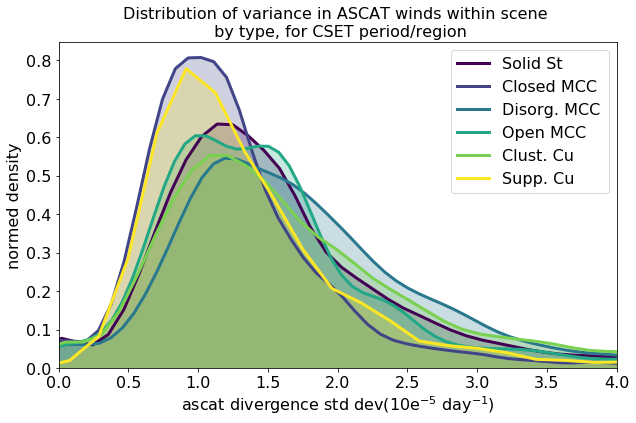

In [7]:
fig, ax = utils.plot_dataframe_by_cat(cset_df, 'ascat_div_std', scale_factor=1e5, xlims=(0, 4) ,xlabel='ascat divergence std dev(10e$^{-5}$ day$^{-1}$)', ax=None, savename=None,
                          cert_thresh=None, verbose=True, hist=False)
ax.set_title('Distribution of variance in ASCAT winds within scene \n by type, for CSET period/region')
fig.savefig(r'/home/disk/p/jkcm/plots/measures/ascat_variance_CSET.png')

(<Figure size 720x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f198076a470>)

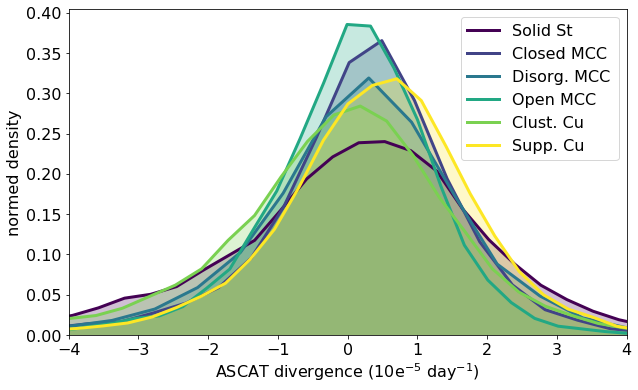

In [41]:
utils.plot_dataframe_by_cat(win_sep_df_cent, 'ascat_div',scale_factor=1e5, xlims=(-4, 4) ,xlabel='ASCAT divergence (10e$^{-5}$ day$^{-1}$)', ax=None, savename=None,
                          cert_thresh=None, verbose=False)

In [35]:
grouped = win_sep_df_cent.groupby('cat')
utils.short_labels

{0: 'Closed MCC ',
 1: 'Clust. Cu',
 2: 'Disorg. MCC',
 3: 'Open MCC',
 4: 'Solid St',
 5: 'Supp. Cu'}

In [36]:
from scipy.stats import ttest_ind
import random
supp_sample = grouped.get_group(5).ascat_div.values
clus_sample = grouped.get_group(1).ascat_div.values


In [37]:
ttest_ind(supp_sample, clus_sample, axis=0, equal_var=False, nan_policy='omit')

Ttest_indResult(statistic=26.061859902650625, pvalue=1.1312766460789275e-147)

In [38]:
for i in range(20):
    a = random.choices(list(supp_sample), k=10000)
    b = random.choices(list(clus_sample), k=10000)
    res = ttest_ind(a, b, equal_var=False, nan_policy='omit')
    print(res[1])

3.8775322656648535e-56
2.522753330443405e-55
1.7671788788106652e-58
4.3899474240033034e-60
1.5655613457138214e-58
1.1490612536235592e-52
2.0112283584509062e-49
2.1778355459976293e-48
1.5494336141828633e-52
1.2820388439797993e-57
3.0906598482349556e-57
1.0384923625877675e-51
9.93968038724083e-65
1.2932520993314108e-68
3.367265965249183e-51
1.0147238944239958e-56
1.6347447598909875e-57
1.060461770906702e-59
7.482711489524695e-55
1.1776967066381919e-48


changed
Solid St:, total:6166, usable:60%
Closed MCC :, total:3291, usable:57%
Disorg. MCC:, total:4340, usable:54%
Open MCC:, total:839, usable:52%
Clust. Cu:, total:10805, usable:52%
Supp. Cu:, total:9936, usable:51%


(<Figure size 720x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc5581202b0>)

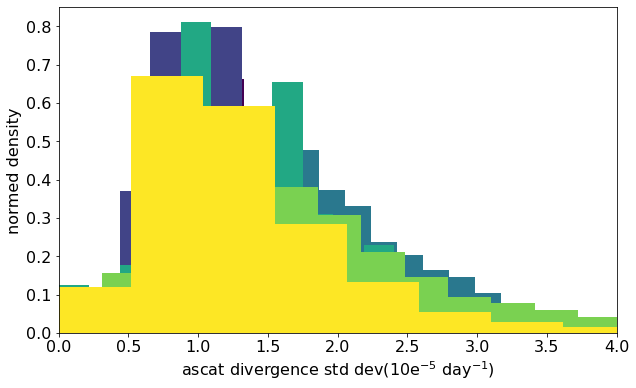

In [146]:
utils.plot_dataframe_by_cat(cset_df, 'ascat_div_std', scale_factor=1e5, xlims=(0, 4) ,xlabel='ascat divergence std dev(10e$^{-5}$ day$^{-1}$)', ax=None, savename=None,
                          cert_thresh=None, verbose=True, hist=True)

changed


(<Figure size 720x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc5beb8fd30>)

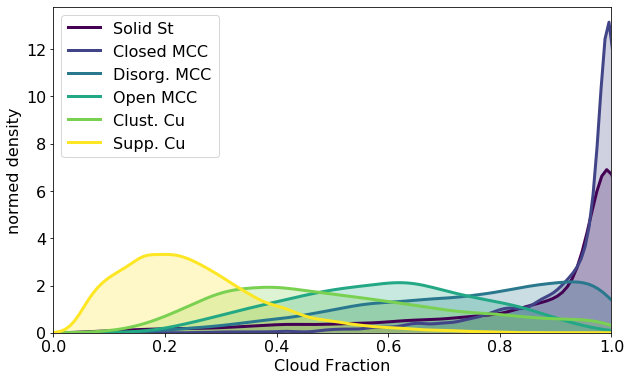

In [49]:
utils.plot_dataframe_by_cat(cset_df, 'low_cf', scale_factor=1, xlims=(0,1), xlabel='Cloud Fraction', ax=None, savename=None,
                          cert_thresh=None, verbose=False)

In [ ]:
scipy.stats.ttest_ind(a, b, axis=0, equal_var=False)

In [163]:
win_sep_df_cent

,cat,cert,date,high_cf,i,j,lat,loc,lon,low_cf,...,sensor_zenith,year,datetime,granule,day,locyear,season,ascat_div,ascat_div_std,ascat_time_offset
113740,5.0,0.999961,2014-06-01 19:10:00,0.109192,0,640,-32.878296,SEP,280.884102,0.859198,...,2.47,2014.0,2014-06-01 19:10:00,MYD021KM.A2014152.1910,2014-06-01,SEP_2014,JJA,-0.000012,0.000022,-4.566667
113741,5.0,0.999824,2014-06-01 19:10:00,0.000122,0,768,-32.666279,SEP,282.280724,0.533329,...,14.06,2014.0,2014-06-01 19:10:00,MYD021KM.A2014152.1910,2014-06-01,SEP_2014,JJA,-0.000008,0.000021,-4.566667
113742,1.0,0.484995,2014-06-01 19:10:00,0.000000,0,896,-32.414341,SEP,283.812790,0.239258,...,25.77,2014.0,2014-06-01 19:10:00,MYD021KM.A2014152.1910,2014-06-01,SEP_2014,JJA,0.000008,0.000009,-4.566667
113743,5.0,0.559087,2014-06-01 19:10:00,0.000000,0,1024,-32.084026,SEP,285.655975,0.369324,...,37.76,2014.0,2014-06-01 19:10:00,MYD021KM.A2014152.1910,2014-06-01,SEP_2014,JJA,0.000014,0.000015,-4.566667
113744,1.0,0.617873,2014-06-01 19:10:00,0.000000,128,1024,-33.197567,SEP,286.035255,0.201904,...,37.77,2014.0,2014-06-01 19:10:00,MYD021KM.A2014152.1910,2014-06-01,SEP_2014,JJA,0.000015,0.000019,-4.566667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699617,1.0,1.000000,2016-08-31 23:25:00,0.027710,1536,128,-60.232368,SEP,215.324081,0.997081,...,44.96,2016.0,2016-08-31 23:25:00,MYD021KM.A2016244.2325,2016-08-31,SEP_2016,JJA,NaN,NaN,NaN
699618,5.0,0.999983,2016-08-31 23:25:00,0.022827,1536,256,-59.964455,SEP,219.096283,0.823834,...,32.67,2016.0,2016-08-31 23:25:00,MYD021KM.A2016244.2325,2016-08-31,SEP_2016,JJA,-0.000022,0.000018,-5.933333
699619,1.0,0.999965,2016-08-31 23:25:00,0.038269,1664,128,-61.388714,SEP,215.673416,0.993982,...,44.97,2016.0,2016-08-31 23:25:00,MYD021KM.A2016244.2325,2016-08-31,SEP_2016,JJA,NaN,NaN,NaN
699620,1.0,0.855348,2016-08-31 23:25:00,0.003479,1664,256,-61.100311,SEP,219.578140,0.977825,...,32.67,2016.0,2016-08-31 23:25:00,MYD021KM.A2016244.2325,2016-08-31,SEP_2016,JJA,0.000012,0.000018,-5.933333


In [34]:
win_sep_df

,cat,cert,date,high_cf,i,j,lat,loc,lon,low_cf,...,sensor_zenith,year,datetime,granule,day,locyear,season,ascat_div,ascat_div_std,ascat_time_offset
117355,2.0,0.981262,2014-06-01 19:10:00,0.109192,0,640,-32.878296,SEP,280.884102,0.859198,...,2.47,2014.0,2014-06-01 19:10:00,MYD021KM.A2014152.1910,2014-06-01,SEP_2014,JJA,-0.000012,0.000022,-4.566667
117356,2.0,0.964820,2014-06-01 19:10:00,0.000122,0,768,-32.666279,SEP,282.280724,0.533329,...,14.06,2014.0,2014-06-01 19:10:00,MYD021KM.A2014152.1910,2014-06-01,SEP_2014,JJA,-0.000008,0.000021,-4.566667
117357,5.0,0.998936,2014-06-01 19:10:00,0.000000,0,896,-32.414341,SEP,283.812790,0.239258,...,25.77,2014.0,2014-06-01 19:10:00,MYD021KM.A2014152.1910,2014-06-01,SEP_2014,JJA,0.000008,0.000009,-4.566667
117358,5.0,0.982745,2014-06-01 19:10:00,0.000000,0,1024,-32.084026,SEP,285.655975,0.369324,...,37.76,2014.0,2014-06-01 19:10:00,MYD021KM.A2014152.1910,2014-06-01,SEP_2014,JJA,0.000014,0.000015,-4.566667
117359,5.0,0.999336,2014-06-01 19:10:00,0.000000,128,1024,-33.197567,SEP,286.035255,0.201904,...,37.77,2014.0,2014-06-01 19:10:00,MYD021KM.A2014152.1910,2014-06-01,SEP_2014,JJA,0.000015,0.000019,-4.566667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726201,4.0,0.999902,2016-08-31 23:25:00,0.027710,1536,128,-60.232368,SEP,215.324081,0.997081,...,44.96,2016.0,2016-08-31 23:25:00,MYD021KM.A2016244.2325,2016-08-31,SEP_2016,JJA,NaN,NaN,NaN
726202,0.0,0.630431,2016-08-31 23:25:00,0.022827,1536,256,-59.964455,SEP,219.096283,0.823834,...,32.67,2016.0,2016-08-31 23:25:00,MYD021KM.A2016244.2325,2016-08-31,SEP_2016,JJA,-0.000022,0.000018,-5.933333
726203,4.0,0.986550,2016-08-31 23:25:00,0.038269,1664,128,-61.388714,SEP,215.673416,0.993982,...,44.97,2016.0,2016-08-31 23:25:00,MYD021KM.A2016244.2325,2016-08-31,SEP_2016,JJA,NaN,NaN,NaN
726204,0.0,0.999997,2016-08-31 23:25:00,0.003479,1664,256,-61.100311,SEP,219.578140,0.977825,...,32.67,2016.0,2016-08-31 23:25:00,MYD021KM.A2016244.2325,2016-08-31,SEP_2016,JJA,0.000012,0.000018,-5.933333


Solid St:, total:18543, usable:58%
Closed MCC :, total:35471, usable:56%
Disorg. MCC:, total:17548, usable:55%
Open MCC:, total:12863, usable:57%
Clust. Cu:, total:36831, usable:54%
Supp. Cu:, total:19154, usable:53%


(<Figure size 720x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f1927b5def0>)

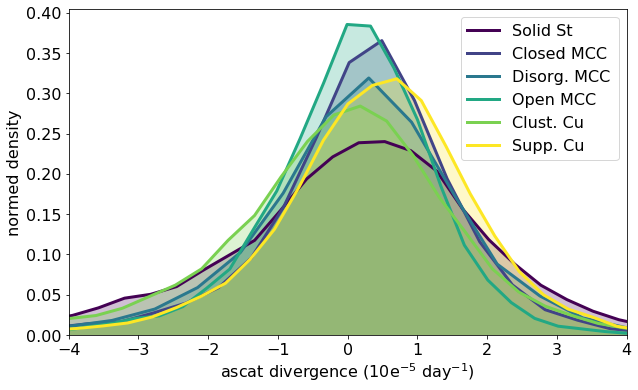

In [32]:
utils.plot_dataframe_by_cat(win_sep_df, 'ascat_div', scale_factor=1e5, xlims=(-4, 4) ,xlabel='ascat divergence (10$^{-5}$ day$^{-1}$)', ax=None, savename=None,
                          cert_thresh=None, verbose=True)

(<Figure size 720x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f197fd03160>)

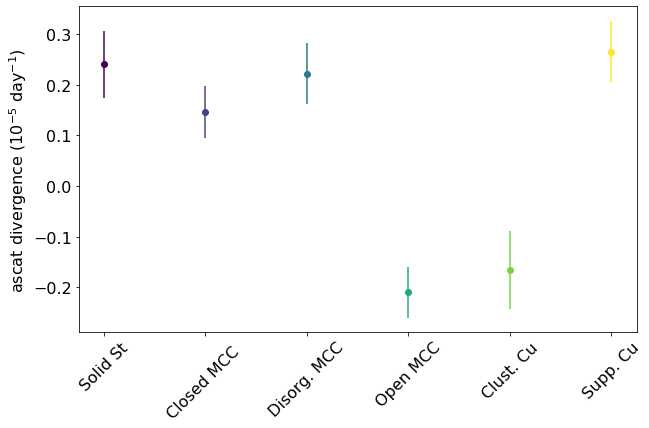

In [98]:
utils.plot_mean_by_cat(cset_df, 'ascat_div', verbose=False, bootstrap=True,
                       scale_factor=1e5, ylabel='ascat divergence (10$^{-5}$ day$^{-1}$)')

Solid St:, total:22900, usable:100%
Closed MCC :, total:42396, usable:100%
Disorg. MCC:, total:29526, usable:100%
Open MCC:, total:15168, usable:100%
Clust. Cu:, total:58094, usable:100%
Supp. Cu:, total:38132, usable:100%


(<Figure size 720x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f197f77ab00>)

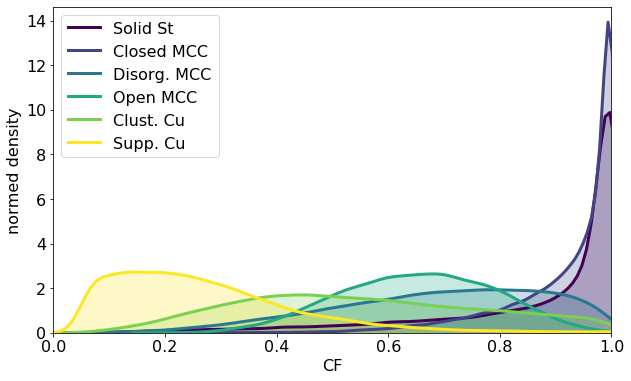

In [84]:
utils.plot_dataframe_by_cat(win_sep_df, 'low_cf', scale_factor=1, xlims=(0,1) ,xlabel='CF',
                            ax=None, savename=None, cert_thresh=None, verbose=True)